In [1]:
%matplotlib inline

import gdal
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dirpath, dirname, filenames = next(os.walk("./data/modis"))

In [3]:
filenames

['arkansas_city.tif',
 'assiniboine.tif',
 'bay_area.tif',
 'berkeley.tif',
 'kashmore.tif',
 'kashmore_north.tif',
 'katrina.tif',
 'katrina_slidell.tif',
 'malawi.tif',
 'mississippi_june.tif',
 'mississippi_may.tif',
 'parana.tif',
 'sava.tif',
 'sava_west.tif',
 'unflooded_mississippi.tif',
 'unflooded_new_orleans.tif']

In [4]:
num_bands = 10

In [5]:
data = []
for file in filenames:
    bands = []
    image = gdal.Open(dirpath + "/" + file)
    
    for band_i in range(num_bands):
        rband = image.GetRasterBand(band_i + 1)
        bands.append(rband.ReadAsArray())
        
    data.append(bands)

In [6]:
data = np.array(data)

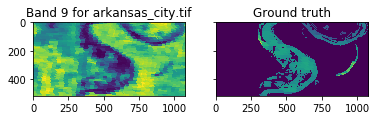

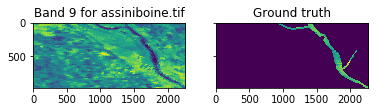

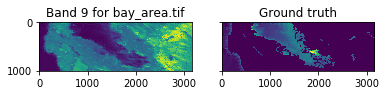

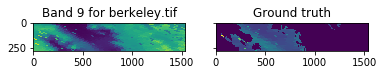

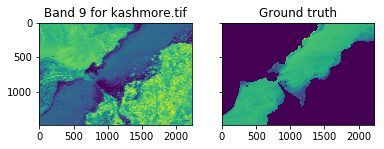

In [7]:
# Sample spectral data
max_sample = 5
band_sample = 9
columns = 2

for index, sample in enumerate(data):
    if index == max_sample:
        break
    
    f, plots = plt.subplots(1, columns, sharey=True)
    
    plots[0].set_title("Band {} for {}".format(band_sample, filenames[index]))
    plots[1].set_title("Ground truth")
    
    imgplot = plots[0].imshow(sample[band_sample])
    
    imgflooded = plots[1].imshow(np.multiply(sample[0], sample[1]))
    